In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Membaca dataset
df = pd.read_csv('car_prices_3.csv')
df.head(5)

,COMPANY,MODEL,TYPE,SIZE,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDay,SaleMonth,SaleYear
0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,2014.0
1,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,2014.0
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,2015.0
3,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,2015.0
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,2014.0


In [4]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (517052, 16)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517052 entries, 0 to 517051
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   COMPANY       507329 non-null  object 
 1   MODEL         507248 non-null  object 
 2   TYPE          507020 non-null  object 
 3   SIZE          504756 non-null  object 
 4   transmission  457270 non-null  object 
 5   state         517050 non-null  object 
 6   condition     510556 non-null  float64
 7   odometer      516989 non-null  float64
 8   color         516301 non-null  object 
 9   interior      516301 non-null  object 
 10  seller        517050 non-null  object 
 11  mmr           517039 non-null  float64
 12  sellingprice  517039 non-null  float64
 13  SaleDay       517039 non-null  object 
 14  SaleMonth     517039 non-null  object 
 15  SaleYear      517041 non-null  float64
dtypes: float64(5), object(11)
memory usage: 63.1+ MB


,condition,odometer,mmr,sellingprice,SaleYear
count,510556.000000,516989.000000,517039.000000,517039.000000,517041.000000
mean,30.575416,68720.500152,13663.113518,13510.101623,2014.911400
std,13.318561,53269.530565,9582.710701,9651.853771,0.284166
min,1.000000,1.000000,25.000000,1.000000,2014.000000
25%,23.000000,28856.000000,7050.000000,6800.000000,2015.000000
50%,34.000000,53051.000000,12200.000000,12000.000000,2015.000000
75%,41.000000,99487.000000,18150.000000,18000.000000,2015.000000
max,49.000000,999999.000000,182000.000000,230000.000000,2015.000000


In [6]:
# 2. Mendeteksi data duplikat
duplikat_count = df.duplicated().sum()
print("Jumlah baris duplikat:", duplikat_count)

Jumlah baris duplikat: 1


In [7]:
# 3. Mendeteksi missing values
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Missing values per kolom:
 COMPANY          9723
MODEL            9804
TYPE            10032
SIZE            12296
transmission    59782
state               2
condition        6496
odometer           63
color             751
interior          751
seller              2
mmr                13
sellingprice       13
SaleDay            13
SaleMonth          13
SaleYear           11
dtype: int64


In [8]:
# 4. Mendeteksi outlier pada kolom numerik menggunakan metode IQR
numeric_cols = ['condition', 'odometer', 'mmr', 'sellingprice', 'SaleYear']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier pada kolom '{col}': {outliers.shape[0]}")

# Simpan salinan data sebelum cleaning untuk perbandingan
df_before = df.copy()

Jumlah outlier pada kolom 'condition': 0
Jumlah outlier pada kolom 'odometer': 9433
Jumlah outlier pada kolom 'mmr': 15126
Jumlah outlier pada kolom 'sellingprice': 15225
Jumlah outlier pada kolom 'SaleYear': 45810


In [9]:
# 5. Data Cleaning:
#    a. Menghapus duplikat
df_clean = df.drop_duplicates()

#    b. Menghapus baris dengan missing values
df_clean = df_clean.dropna()

#    c. Menghapus outlier untuk masing-masing kolom numerik (menggunakan IQR)
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Menampilkan perbandingan dimensi data sebelum dan sesudah cleaning
print("Dimensi data sebelum cleaning:", df_before.shape)
print("Dimensi data setelah cleaning:", df_clean.shape)

Dimensi data sebelum cleaning: (517052, 16)
Dimensi data setelah cleaning: (383523, 16)


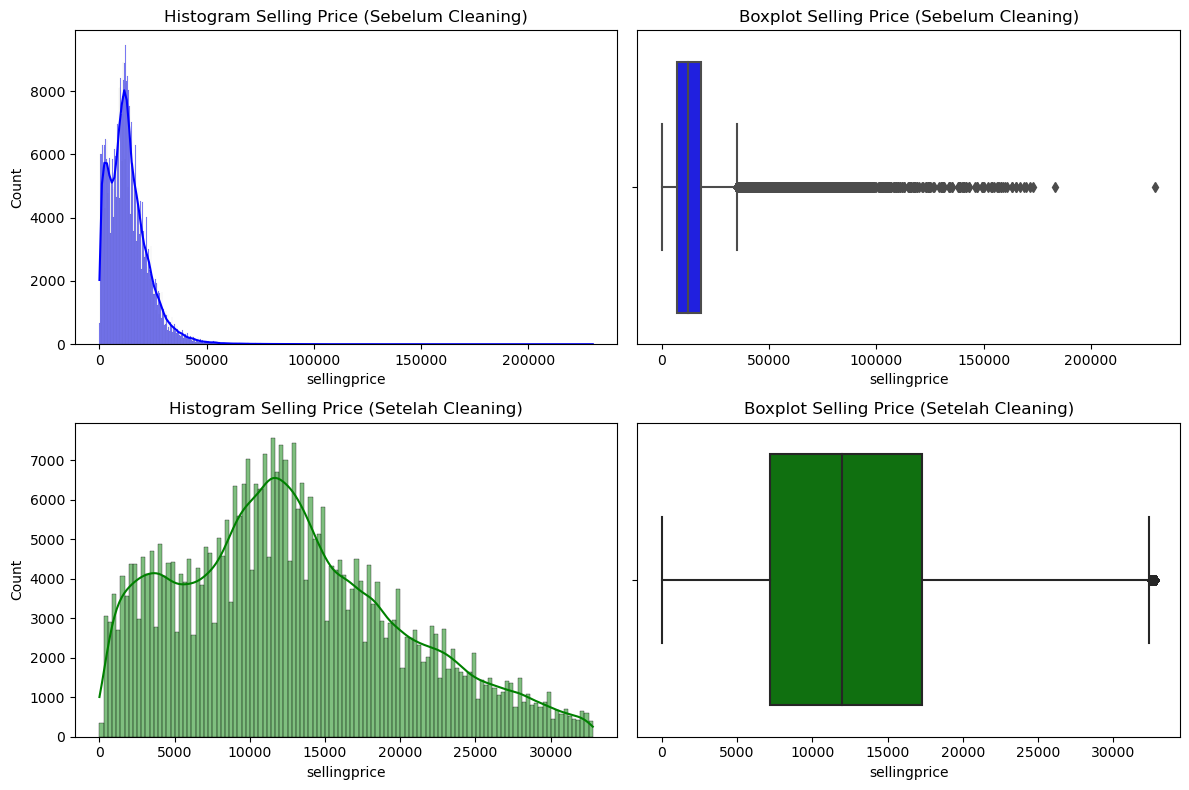

In [10]:
# 6. Menampilkan histogram dan boxplot pada kolom 'sellingprice' sebagai contoh

plt.figure(figsize=(12, 8))

# Histogram dan boxplot sebelum cleaning
plt.subplot(2, 2, 1)
sns.histplot(df_before['sellingprice'], kde=True, color='blue')
plt.title("Histogram Selling Price (Sebelum Cleaning)")

plt.subplot(2, 2, 2)
sns.boxplot(x=df_before['sellingprice'], color='blue')
plt.title("Boxplot Selling Price (Sebelum Cleaning)")

# Histogram dan boxplot setelah cleaning
plt.subplot(2, 2, 3)
sns.histplot(df_clean['sellingprice'], kde=True, color='green')
plt.title("Histogram Selling Price (Setelah Cleaning)")

plt.subplot(2, 2, 4)
sns.boxplot(x=df_clean['sellingprice'], color='green')
plt.title("Boxplot Selling Price (Setelah Cleaning)")

plt.tight_layout()
plt.show()

In [11]:
# 7. Menyimpan dataset yang telah dilakukan cleaning ke file CSV baru
df_clean.to_csv('car_prices_3_cleaned.csv', index=False)
print("Dataset hasil cleaning telah disimpan sebagai 'car_prices_3_cleaned.csv'")

Dataset hasil cleaning telah disimpan sebagai 'car_prices_3_cleaned.csv'


In [12]:
# Menghitung metrik dari dataset hasil cleaning
total_brands = df_clean['COMPANY'].nunique()
total_types = df_clean['TYPE'].nunique()
total_models = df_clean['MODEL'].nunique()
total_sales = df_clean.shape[0]
avg_price = df_clean['sellingprice'].mean()
total_sales_profit = df_clean['sellingprice'].sum()

print("Total Brands:", total_brands)
print("Total Types:", total_types)
print("Total Models:", total_models)
print("Total Sales:", total_sales)
print("Average Price:", avg_price)
print("Total Sales Profit:", total_sales_profit)

Total Brands: 45
Total Types: 1366
Total Models: 704
Total Sales: 383523
Average Price: 12652.600978298564
Total Sales Profit: 4852563485.0


   State  Jumlah Mobil
0     fl         60515
1     ca         50133
2     tx         33243
3     ga         25792
4     pa         21176
5     nj         19678
6     il         18896
7     oh         16414
8     nc         15486
9     mo         12692
10    mi         12445
11    tn         11949
12    nv          8409
13    md          8333
14    va          7789
15    wi          7483
16    mn          7001
17    az          6491
18    wa          6048
19    ma          5543
20    co          5203
21    ny          4245
22    in          3365
23    sc          3246
24    ne          3140
25    pr          2147
26    ut          1531
27    ms          1525
28    la          1494
29    hi          1017
30    or           899
31    nm           131
32    ok            39
33    al            25


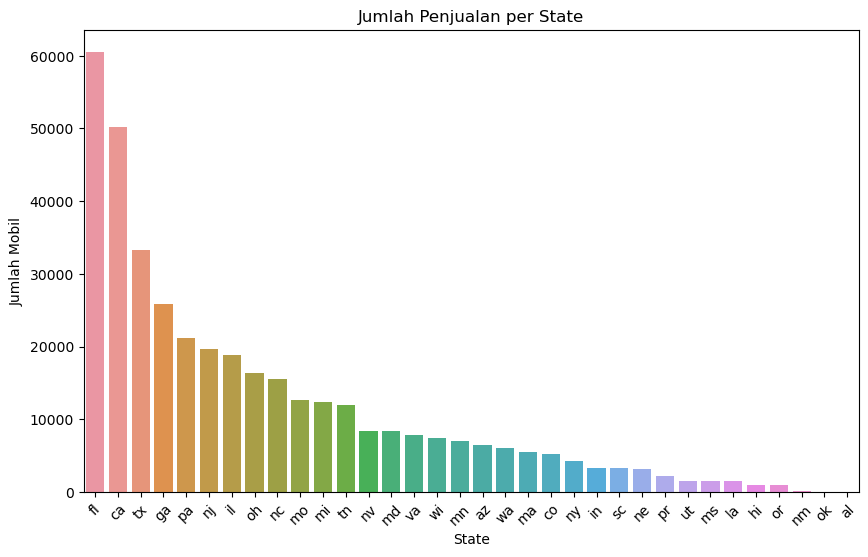

In [13]:
# Tabel: Hitung jumlah penjualan per state
state_sales = df_clean['state'].value_counts().reset_index()
state_sales.columns = ['State', 'Jumlah Mobil']
print(state_sales)

# Bar Chart:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Jumlah Mobil', data=state_sales)
plt.title("Jumlah Penjualan per State")
plt.xticks(rotation=45)
plt.show()

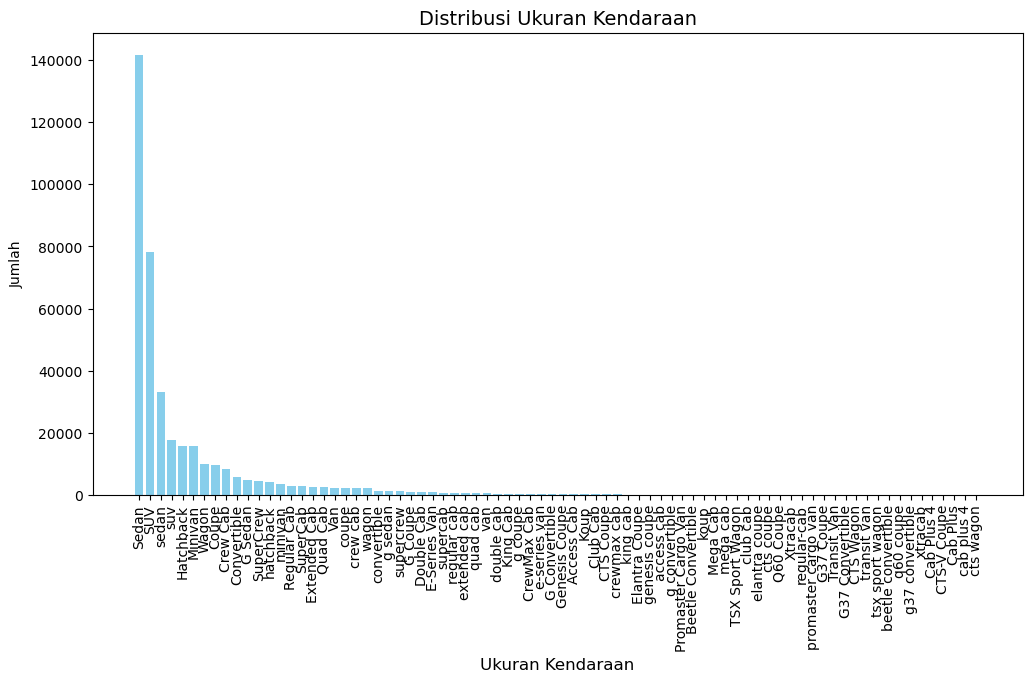

In [14]:
# Menghitung jumlah masing-masing kategori SIZE
vehicle_size_counts = df_clean['SIZE'].value_counts()

# Membuat Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(vehicle_size_counts.index, vehicle_size_counts.values, color='skyblue')

# Menambahkan judul dan label
plt.title("Distribusi Ukuran Kendaraan", fontsize=14)
plt.xlabel("Ukuran Kendaraan", fontsize=12)
plt.ylabel("Jumlah", fontsize=10)
plt.xticks(rotation=90)  # Memiringkan label jika perlu

# Menampilkan plot
plt.show()


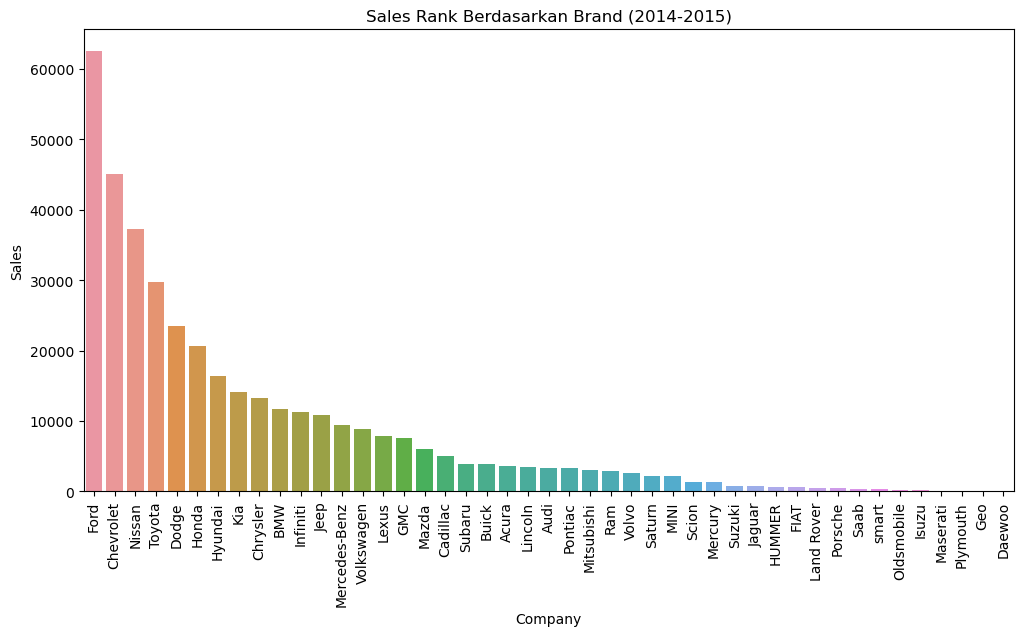

In [15]:
# Filter data tahun 2014 dan 2015
df_2014_2015 = df_clean[df_clean['SaleYear'].isin([2014, 2015])]
brand_sales = df_2014_2015['COMPANY'].value_counts().reset_index()
brand_sales.columns = ['Company', 'Sales']

plt.figure(figsize=(12,6))
sns.barplot(x='Company', y='Sales', data=brand_sales)
plt.title("Sales Rank Berdasarkan Brand (2014-2015)")
plt.xticks(rotation=90)
plt.show()

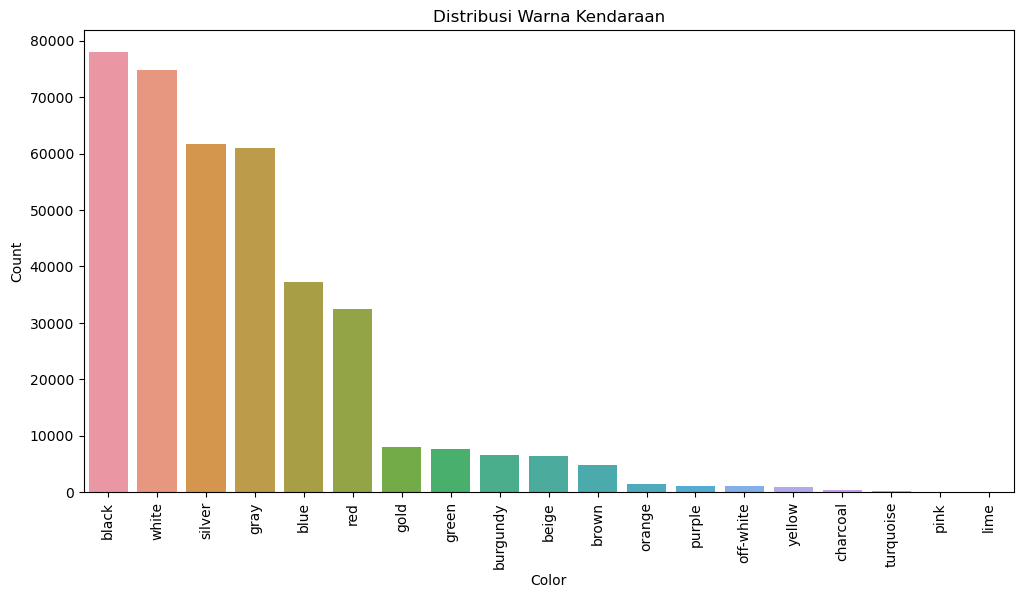

In [16]:
color_counts = df_clean['color'].value_counts().reset_index()
color_counts.columns = ['Color', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(x='Color', y='Count', data=color_counts)
plt.title("Distribusi Warna Kendaraan")
plt.xticks(rotation=90)
plt.show()

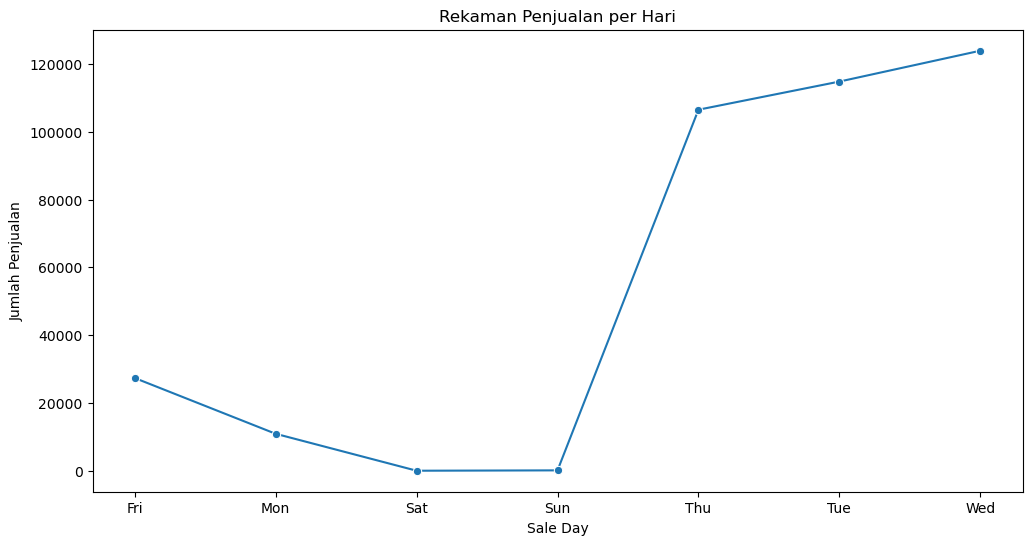

In [17]:
sales_per_day = df_clean['SaleDay'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=sales_per_day.index, y=sales_per_day.values, marker='o')
plt.title("Rekaman Penjualan per Hari")
plt.xlabel("Sale Day")
plt.ylabel("Jumlah Penjualan")
plt.show()